In [1]:
import matplotlib.pyplot as plt
import numpy as np
from parzen_estimator import NumericalParzenEstimator

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14
plt.rcParams['mathtext.fontset'] = 'stix'  # The setting of math font

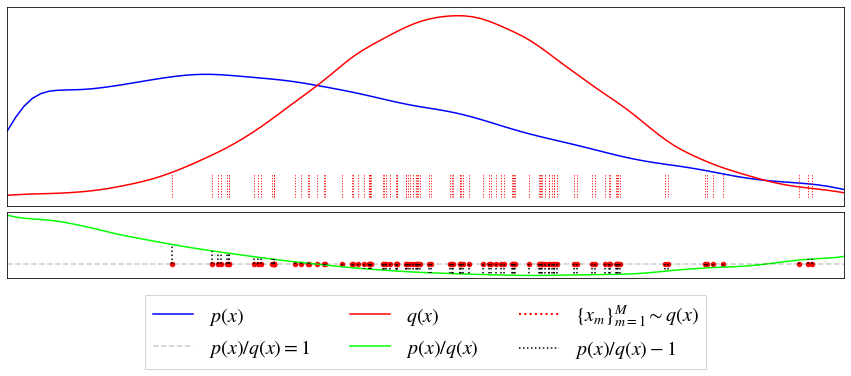

In [2]:
TICK_PARAMS = dict(
    labelbottom=False,
    bottom=False,
    labelleft=False,
    left=False,
)

_, axes = plt.subplots(
    nrows=2,
    sharex=True,
    figsize=(15, 5),
    gridspec_kw=dict(
        height_ratios=(3, 1),
        hspace=0.05,
    )
)

LB, UB = -3, 3
dx = np.linspace(LB, UB, 100)
rng = np.random.RandomState(0)
X1 = rng.normal(loc=-1.5, scale=2, size=100000)
X1 = X1[(LB <= X1) & (X1 <= UB)][:30000]
X2 = rng.normal(loc=0.2, scale=1.0, size=100000)
X2 = X2[(LB <= X2) & (X2 <= UB)][:30000]

pe1 = NumericalParzenEstimator(samples=X1, lb=LB, ub=UB)
pe2 = NumericalParzenEstimator(samples=X2, lb=LB, ub=UB)

ax = axes[0]
ax.tick_params(**TICK_PARAMS)

lines = []
labels = [
    "$p(x)$",
    "$q(x)$",
    "$\\{x_m\\}_{m=1}^M \sim q(x)$",
    "$p(x)/q(x)$",
    "$p(x)/q(x) = 1$",
    "$p(x)/q(x) - 1$",
]

pdf1_vals = pe1(dx)
pdf2_vals = pe2(dx)
# ax.vlines(X1, 0, 0.1, color="red", linestyle="dotted", lw=0.1)
# ax.vlines(X2, 0, 0.1, color="blue", linestyle="dotted", lw=0.1)
line, = ax.plot(dx, pe1(dx), color="blue")
lines.append(line)
line, = ax.plot(dx, pe2(dx), color="red")
lines.append(line)
samples = pe2.sample(rng=rng, n_samples=100)
ax.vlines(samples, 0, 0.05, color="red", linestyle="dotted", lw=1)
line = ax.vlines(0, 0, 0, color="red", linestyle="dotted", lw=2)
lines.append(line)

ax = axes[1]
ax.tick_params(**TICK_PARAMS)

density_ratio = pdf1_vals / pdf2_vals

line, = ax.plot(dx, np.log(density_ratio), color="lime")
lines.append(line)
line = ax.hlines(0, LB, UB, color="black", alpha=0.2, linestyle="dashed")
lines.append(line)
ax.scatter(samples, np.zeros_like(samples), s=20, color="red")
line = ax.vlines(samples, 0, np.log(pe1(samples) / pe2(samples)), color="black", linestyle="dotted")
lines.append(line)
# ax.text(0, 1, "$D_{\mathrm{PE}}(p||q)$ is the mean of ")
ax.set_xlim(LB, UB)

def swap(i, j):
    lines[i], lines[j] = lines[j], lines[i]
    labels[i], labels[j] = labels[j], labels[i]


swap(1, 2)
swap(1, 4)
ax.legend(
    handles=lines,
    labels=labels,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.1),  # ここは調整が必要です
    fancybox=False,
    shadow=False,
    fontsize=20,
    ncol=(len(labels) + 1) // 2,
)
plt.savefig("figs/ped-conceptual.pdf", bbox_inches="tight")